In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import calendar
import math
import pickle
import calendar
import warnings
warnings.filterwarnings("ignore")




sns.set_style('whitegrid')
%matplotlib inline

In [4]:
df = pd.read_csv('220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv')

In [5]:
df = df.drop(columns =['VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT',
                   'ZWOELF_MONATE_MITTELWERT'], axis= 1)


df['MONAT'] = df['MONAT'].str[-2:]
df['MONAT'] = df['MONAT'].replace(regex='me', value=0)

df['MONAT'] =pd.to_numeric(df['MONAT'])
df['MONAT'] = df['MONAT'].apply(lambda x: calendar.month_abbr[x])
df['MONAT'] = df['MONAT'].replace(regex='', value='Whole Year')

In [6]:
df = df.drop(df[df.MONAT == 'Whole Year'].index)
df['MONAT'].value_counts()


Jan    161
Feb    161
Mar    161
Apr    161
May    161
Jun    161
Jul    161
Aug    161
Sep    161
Oct    161
Nov    161
Dec    161
Name: MONAT, dtype: int64

In [7]:
pd.DataFrame(df.isnull().sum())

,0
MONATSZAHL,0
AUSPRAEGUNG,0
JAHR,0
MONAT,0
WERT,84


In [8]:
df['WERT'].fillna((df['WERT'].mean()), inplace=True)

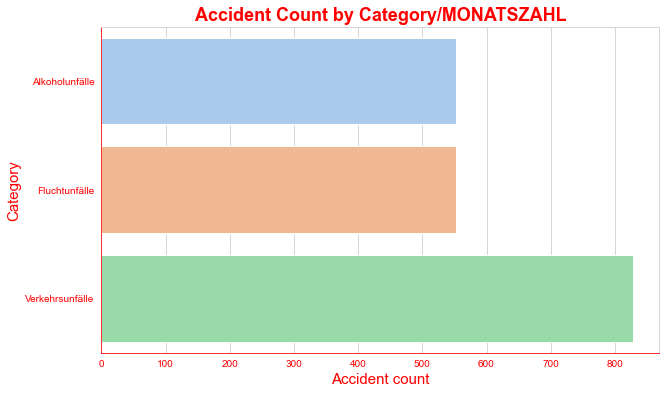

In [26]:
plt.figure(figsize=(10,6))

ax = sns.countplot(y='MONATSZAHL', data = df, palette='pastel')
ax.set_title('Accident Count by Category/MONATSZAHL',fontsize = 18, fontweight='bold', color='red' )
ax.set_ylabel('Category', fontsize = 15)
ax.set_xlabel('Accident count', fontsize = 15)

ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('red')
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')

ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

plt.savefig('Monatzahl.png', bbox_inches='tight', pad_inches=0)

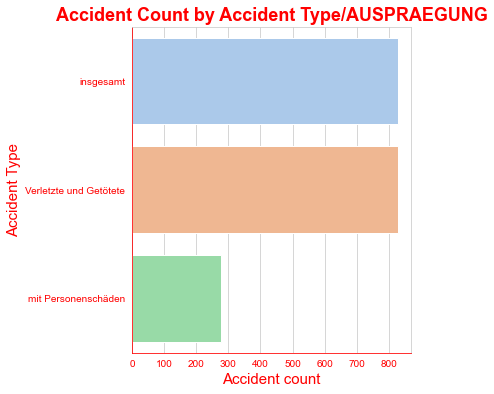

In [22]:
plt.figure(figsize=(5,6))

ax = sns.countplot(y='AUSPRAEGUNG', data = df, palette='pastel')
ax.set_title('Accident Count by Accident Type/AUSPRAEGUNG',fontsize = 18, fontweight='bold', color='red' )
ax.set_ylabel('Accident Type', fontsize = 15)
ax.set_xlabel('Accident count', fontsize = 15)

ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('red')
ax.xaxis.label.set_color('red')
ax.yaxis.label.set_color('red')

ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='red')

plt.savefig('Auspraegung.png', bbox_inches='tight', pad_inches=0)

plt.show()

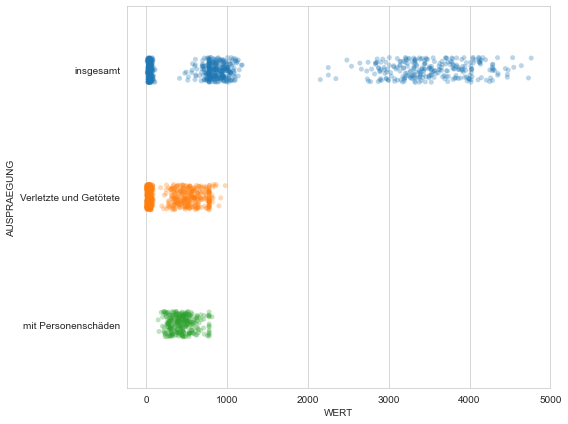

In [23]:
plt.figure(figsize=(8,6))

ax = sns.stripplot(y='AUSPRAEGUNG', x='WERT',alpha=0.3, data=df)
plt.tight_layout()

In [27]:
categorical_cols = ['MONATSZAHL', 'AUSPRAEGUNG', 'MONAT'] 

# df['MONATSZAHL'].apply(LabelEncoder().fit_transform)

for col in categorical_cols:
    one_hot = pd.get_dummies(df[col])
    df = df.drop(col,axis = 1)
    df = df.join(one_hot)



In [28]:
test_data = df[df['JAHR'] > 2020]
df = df[df['JAHR'] < 2021]

In [29]:
x = df.drop('WERT', axis=1)
y = df['WERT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [31]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Pkl_Filename = "./model/scaler.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(sc, file)

In [32]:
models=[]
model_score=[]
models.append(['Logistic Regression', LinearRegression()])
models.append(['Ridge', Ridge(alpha=0.3, random_state = 0)])
models.append(['KNeighborsRegressor', KNeighborsRegressor(n_neighbors = 10)])
models.append(['MLPRegressor', MLPRegressor(alpha = 0.001, batch_size = 400)])
models.append(['LinearSVR', LinearSVR()])
models.append(['DecisionTreeRegressor', DecisionTreeRegressor()])
models.append(['ExtraTreeRegressor',ExtraTreeRegressor()])


----------------------------------------------------------------------------------------------
Logistic Regression :
---------------------------------------------

MSE : 390085.08772671054
RMSE : 624.5679208274394



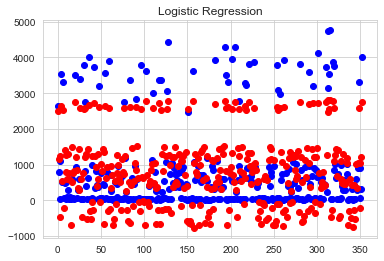

----------------------------------------------------------------------------------------------
Ridge :
---------------------------------------------

MSE : 388673.73897472944
RMSE : 623.4370368968541



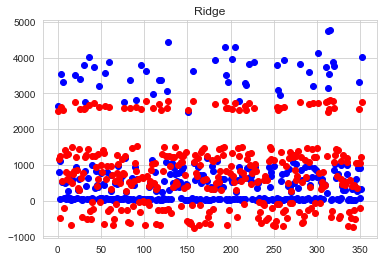

----------------------------------------------------------------------------------------------
KNeighborsRegressor :
---------------------------------------------

MSE : 21553.758470254954
RMSE : 146.81198340140682



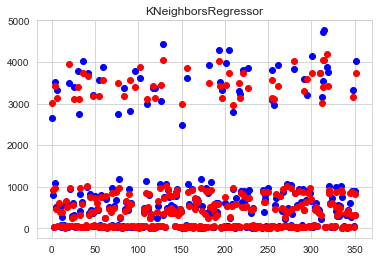

----------------------------------------------------------------------------------------------
MLPRegressor :
---------------------------------------------

MSE : 1393543.3075039655
RMSE : 1180.4843529263594



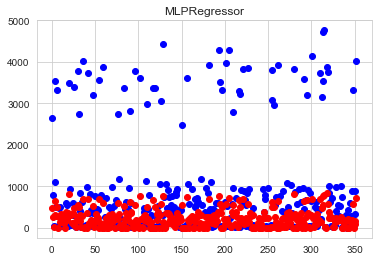

----------------------------------------------------------------------------------------------
LinearSVR :
---------------------------------------------

MSE : 1138598.6792931887
RMSE : 1067.051394869614



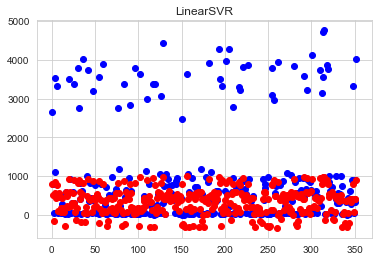

----------------------------------------------------------------------------------------------
DecisionTreeRegressor :
---------------------------------------------

MSE : 14470.685552407933
RMSE : 120.29416258658577



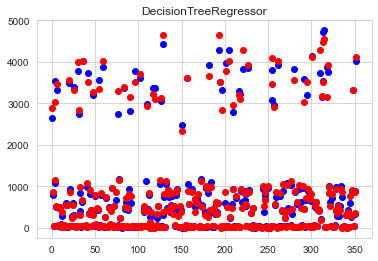

----------------------------------------------------------------------------------------------
ExtraTreeRegressor :
---------------------------------------------

MSE : 17920.14447592068
RMSE : 133.8661438748449



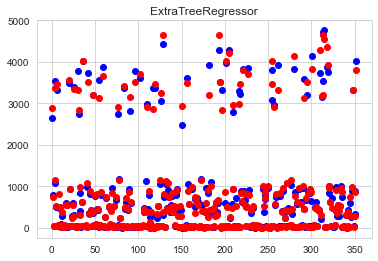

In [33]:
model_data=[]

def plotGraph(y_test, y_pred, regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return


for model in models:
        data=[]
        model[1].fit(x_train, y_train)
        y_pred = model[1].predict(x_test)
        MSE = mean_squared_error(y_test, y_pred)
        RMSE = math.sqrt(MSE)
        print('----------------------------------------------------------------------------------------------')
        print(f'{model[0]} :')
        print('---------------------------------------------')
        print('')
        print(f'MSE : {MSE}')
        print(f'RMSE : {RMSE}')
        print('')
        plotGraph(y_test, y_pred, model[0])
        data.append(model[0])
        data.append(y_pred)
        model_data.append(data)
        model_score.append(model_score)




In [34]:
gridmodels=[('ExtraTreeRegressor', ExtraTreeRegressor(),[{'max_depth': [2,4,5,10,15,20,25,50,100, 250], 
                            'min_samples_split':[2,5,10,20,25,50,100], 'random_state': [0,10,25,50,100]}]),
            ('DecisionTreeRegressor', DecisionTreeRegressor(), [{'max_depth': [5,10,15,25,50,100,250], 
                        'min_samples_split':[2,5,10,20], 'random_state': [0,10,25,50,100]}]),
            ('KNeighborsRegressor', KNeighborsRegressor(), [{'leaf_size': [30,50,75,100,200,500], 
                                                             'n_neighbors': [5,10,25,50,100,250,500]}])
]

In [35]:
for gridmodel in gridmodels:
    grid = GridSearchCV(estimator=gridmodel[1],param_grid = gridmodel[2], cv = 20)
    grid.fit(x_train, y_train)
    best_param = grid.best_params_
    best_estimator = grid.best_estimator_
    best_score = grid.best_score_
    print('----------------')
    print()
    print('Best Parameters : ',best_param)
    print('')
    print('Best estimator : ',best_estimator)
    print('')
    print('Best score : ',best_score)
    print('')
    print('----------------')
    print('')

----------------

Best Parameters :  {'max_depth': 15, 'min_samples_split': 10, 'random_state': 50}

Best estimator :  ExtraTreeRegressor(max_depth=15, min_samples_split=10, random_state=50)

Best score :  0.9876075819876942

----------------

----------------

Best Parameters :  {'max_depth': 10, 'min_samples_split': 10, 'random_state': 10}

Best estimator :  DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=10)

Best score :  0.989582123282932

----------------

----------------

Best Parameters :  {'leaf_size': 30, 'n_neighbors': 5}

Best estimator :  KNeighborsRegressor()

Best score :  0.9865362455947565

----------------

